#📌 Extracão

In [1]:
# Realizar as importações das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Criar DataFrame a partir de um arquivo JSON disponível online
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

# Ler o arquivo JSON da URL e armazenar os dados em um DataFrame
df = pd.read_json(url)

#🔧 Transformação

### Conhecendo o Dataset

In [2]:
 # Exibe um resumo, incluindo número de entradas, colunas, tipos de dados e valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [3]:
# Mostra os tipos de dados de cada coluna
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [4]:
# Lista os nomes de todas as colunas
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa
* `gender`: gênero (masculino e feminino)
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico
* `MultipleLines`: assisnatura de mais de uma linha de telefone
* `InternetService`: assinatura de um provedor internet
* `OnlineSecurity`: assinatura adicional de segurança online
* `OnlineBackup`: assinatura adicional de backup online
* `DeviceProtection`: assinatura adicional de proteção no dispositivo
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo
* `StreamingMovies`: assinatura de streaming de filmes
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

### Colunas Principais para análise de evasão

* `Churn`: verificar quais clientes deixaram a empresa.

* `gender` e `SeniorCitizen`: entender quais grupos compõem a base de clientes e se há perfis mais propensos à evasão.

* `tenure`: analisar o tempo médio de contrato e sua relação com a fidelização.

* `Contract`: entender quais tipos de contrato são mais atrativos e retêm melhor os clientes.

* `PaperlessBilling`: verificar se a preferência por fatura digital está associada à permanência ou evasão.

* `PaymentMethod`: verificar se a forma de pagamento influencia na evasão e se é possível tornar o processo mais simples.

* `Charges.Monthly` e `Charges.Total`: entender se a evasão está relacionada ao custo dos serviços, avaliando se o motivo é preço ou percepção de qualidade.

### Verificando Inconsistências nos Dados

In [5]:
# Visualizar o modo como os dados estão dispostos
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [6]:
# Verificar os valores vazios em casa coluna
for col in df.columns:
    vazios = ((df[col].astype(str).str.strip() == '') |
              (df[col].astype(str).str.strip() == ' ')).sum()
    print(f'{col}: {vazios} valores vazios')

customerID: 0 valores vazios
Churn: 224 valores vazios
customer: 0 valores vazios
phone: 0 valores vazios
internet: 0 valores vazios
account: 0 valores vazios


### Tratando as Inconsistências

In [7]:
# Normalizar as colunas necessárias
df_drop = df.drop(['customer', 'phone', 'internet', 'account'], axis=1)
df_expandido = pd.concat([df_drop, df['customer'].apply(pd.Series), df['phone'].apply(pd.Series), df['internet'].apply(pd.Series), df['account'].apply(pd.Series)], axis=1)
df_expandido.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [8]:
# Normalizar a coluna 'Charges'
df_drop_charges = df_expandido.drop(['Charges'], axis=1)
df_final = pd.concat([df_drop_charges, df_expandido['Charges'].apply(pd.Series)], axis=1)
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [9]:
# Trocar valores vazios por NaN para facilitar a construção dos gráficos posteriomente
df_final.replace(['', ' ', 'NaN', 'null'], np.nan, inplace=True)

In [10]:
# Coferir de a troca foi feita corretamente
for col in df_final.columns:
  print(f'{col}: {df_final[col].isna().sum()}')

customerID: 0
Churn: 224
gender: 0
SeniorCitizen: 0
Partner: 0
Dependents: 0
tenure: 0
PhoneService: 0
MultipleLines: 0
InternetService: 0
OnlineSecurity: 0
OnlineBackup: 0
DeviceProtection: 0
TechSupport: 0
StreamingTV: 0
StreamingMovies: 0
Contract: 0
PaperlessBilling: 0
PaymentMethod: 0
Monthly: 0
Total: 11


### Coluna de Contas Diárias

In [11]:
# Criação da coluna 'Contas_Diarias'
df_final['Contas_Diarias'] = round(df_final['Monthly']/30, 2)

In [12]:
# Data Frame atualizado com a nova coluna
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.80


### Padronização e Transformação de Dados

In [13]:
# Atualizar o Data Frame adicionando a mundança de trocar 'No' por '0' e 'Yes' por '1'
df_final = df_final.replace({'No':0, 'Yes': 1})

/tmp/ipython-input-13-2558969045.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final = df_final.replace({'No':0, 'Yes': 1})


In [14]:
# Data Frame atualizado com todas as mudanças necessárias
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Contas_Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.80


#📊 Carga e análise

### Análise Descritiva

In [15]:
#Exibir respectivamente: Média, Desvio padrão e Mediana

df_final.describe().iloc[['1', '2', '5']]

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Monthly,Contas_Diarias
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2.157292
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,1.004407
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,2.340000


### Distribuição da Evasão

In [16]:
# Clientes que permaneceram (Churn = 0)
churn_nao = df_final[df_final['Churn'] == 0].copy()

# Clientes que saíram (Churn = 1)
churn_sim = df_final[df_final['Churn'] == 1].copy()


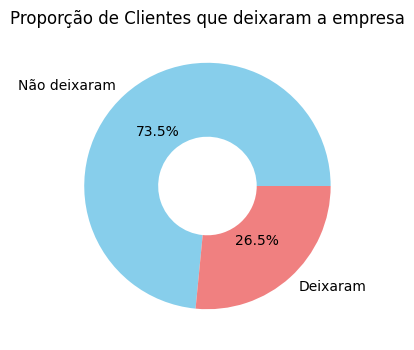

In [17]:
# Criar gráfico para verificar a propoção dos clientes que deixaram e não deixaram a empresa

fig, ax = plt.subplots(figsize=(8, 4))

cores = ['skyblue', 'lightcoral']
label = ['Não deixaram', 'Deixaram']
ax.pie(df_final['Churn'].value_counts(), labels=label, autopct='%1.1f%%', colors = cores, wedgeprops=dict(width=0.6), startangle=360)
plt.title('Proporção de Clientes que deixaram a empresa')
plt.show()

### Contagem de Evasão por Variáveis Categóricas

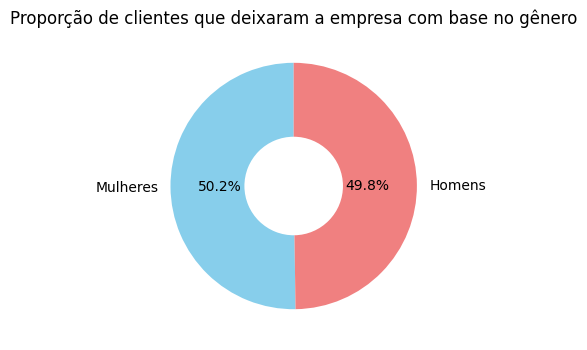

In [18]:
# Proporção de clientes que deixaram a empresa com base no gênero

fig, ax = plt.subplots(figsize=(8, 4))

cores = ['skyblue', 'lightcoral']
label = ['Mulheres', 'Homens']
ax.pie(churn_sim['gender'].value_counts(), labels=label, autopct='%1.1f%%', colors = cores, wedgeprops=dict(width=0.6), startangle=90)
plt.title('Proporção de clientes que deixaram a empresa com base no gênero')
plt.show()

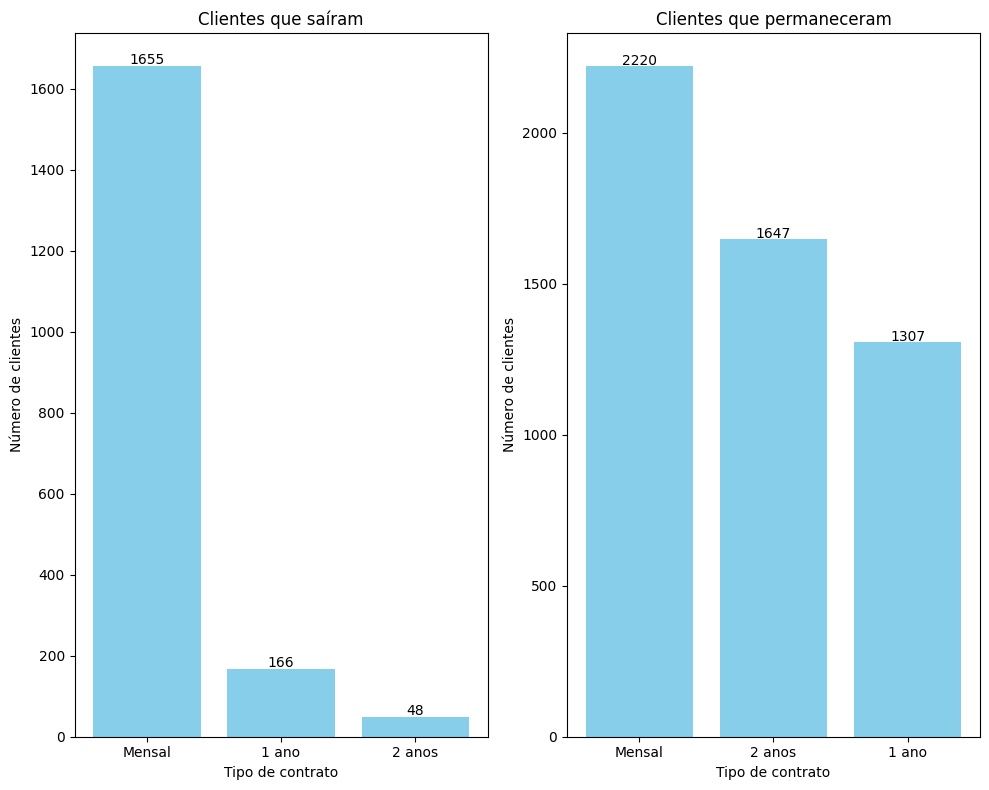

In [19]:
# Dicionário de tradução dos tipos de contrato
traducao_contratos = {
    'Month-to-month': 'Mensal',
    'One year': '1 ano',
    'Two year': '2 anos'
}

# Substituindo os valores da coluna 'Contract' com base no dicionário
churn_sim.loc[:, 'Contract'] = churn_sim['Contract'].replace(traducao_contratos)
churn_nao.loc[:, 'Contract'] = churn_nao['Contract'].replace(traducao_contratos)

# Contando a quantidade de clientes por tipo de contrato
contratos_sim = churn_sim['Contract'].value_counts()
contratos_nao = churn_nao['Contract'].value_counts()

# Criando os gráficos de barras
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

# Gráfico para clientes que saíram
ax[0].bar(contratos_sim.index, contratos_sim.values, color='skyblue')
ax[0].set_xlabel('Tipo de contrato')
ax[0].set_ylabel('Número de clientes')
ax[0].set_title('Clientes que saíram')

# Gráfico para clientes que permaneceram
ax[1].bar(contratos_nao.index, contratos_nao.values, color='skyblue')
ax[1].set_xlabel('Tipo de contrato')
ax[1].set_ylabel('Número de clientes')
ax[1].set_title('Clientes que permaneceram')

# Adicionando os valores acima das barras
for i, (contrato, valor) in enumerate(zip(contratos_sim.index, contratos_sim.values)):
    ax[0].text(i, valor + 5, str(valor), color='black', fontsize=10, ha='center')

for i, (contrato, valor) in enumerate(zip(contratos_nao.index, contratos_nao.values)):
    ax[1].text(i, valor + 5, str(valor), color='black', fontsize=10, ha='center')

plt.tight_layout()
plt.show()


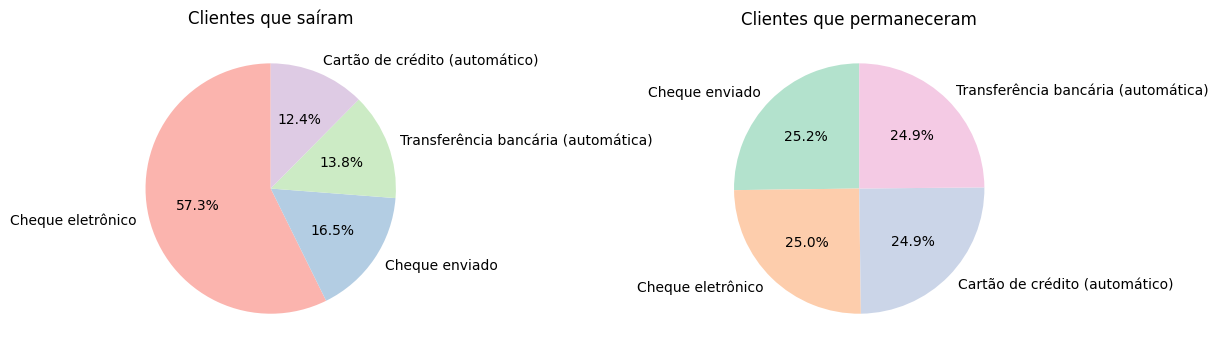

In [20]:
import matplotlib.pyplot as plt

# Tradução dos métodos de pagamento
traducao_pagamentos = {
    'Electronic check': 'Cheque eletrônico',
    'Mailed check': 'Cheque enviado',
    'Bank transfer (automatic)': 'Transferência bancária (automática)',
    'Credit card (automatic)': 'Cartão de crédito (automático)'
}

# Aplicando a tradução
churn_sim['PaymentMethod'] = churn_sim['PaymentMethod'].replace(traducao_pagamentos)
churn_nao['PaymentMethod'] = churn_nao['PaymentMethod'].replace(traducao_pagamentos)

# Contagem dos métodos de pagamento
pagamentos_sim = churn_sim['PaymentMethod'].value_counts()
pagamentos_nao = churn_nao['PaymentMethod'].value_counts()

# Criando os gráficos de pizza
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Pizza para clientes que saíram
ax[0].pie(
    pagamentos_sim.values,
    labels=pagamentos_sim.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors
)
ax[0].set_title('Clientes que saíram')

# Pizza para clientes que permaneceram
ax[1].pie(
    pagamentos_nao.values,
    labels=pagamentos_nao.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel2.colors
)
ax[1].set_title('Clientes que permaneceram')

plt.tight_layout()
plt.show()


### Contagem de Evasão por Variáveis Numéricas

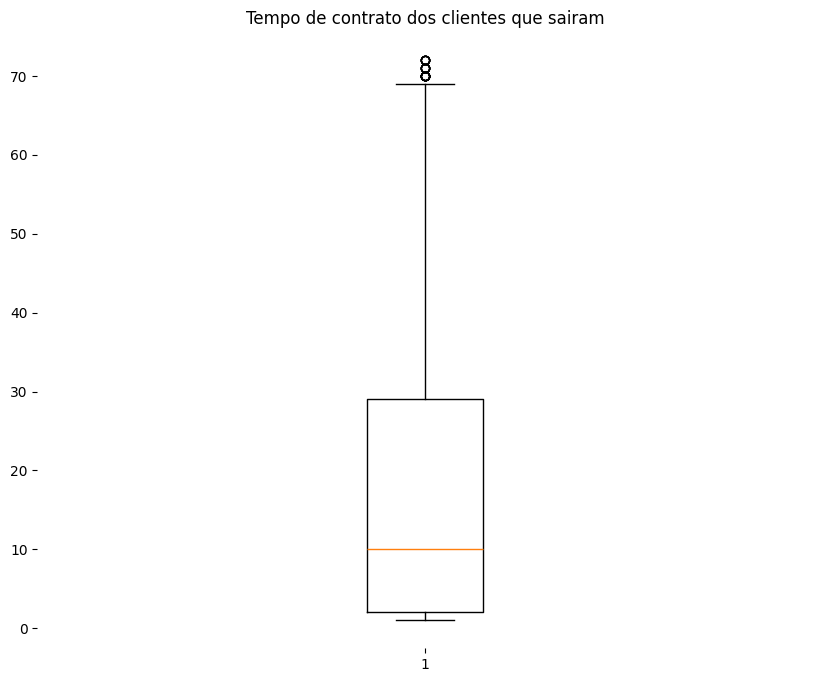

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.boxplot(churn_sim['tenure'])
ax.set_title('Tempo de contrato dos clientes que sairam')
ax.set_frame_on(False)
plt.show()

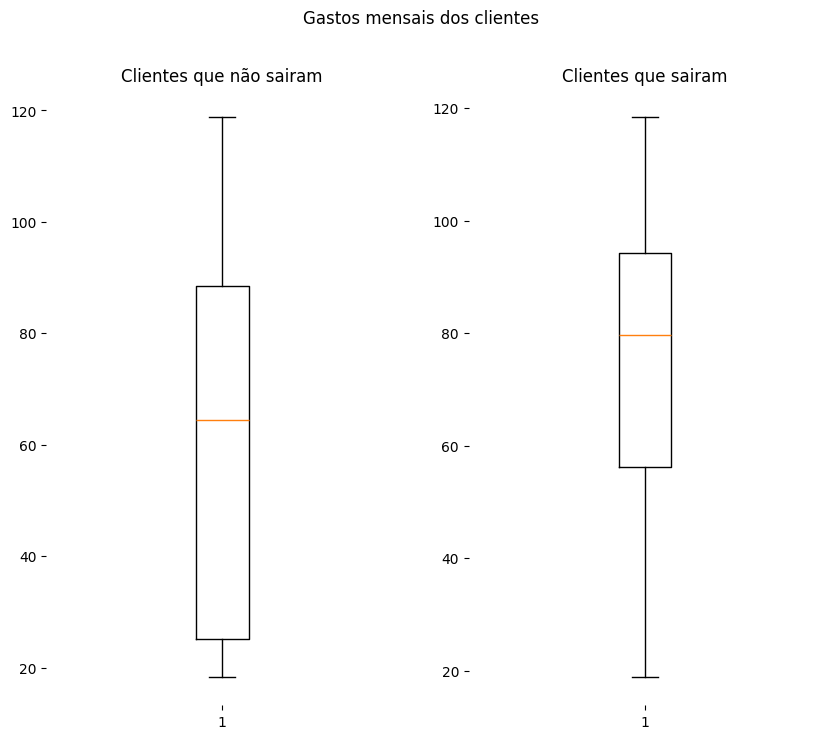

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

fig.suptitle('Gastos mensais dos clientes')

ax[0].boxplot(churn_nao['Monthly'])
ax[0].set_title('Clientes que não sairam')
ax[0].set_frame_on(False)

ax[1].boxplot(churn_sim['Monthly'])
ax[1].set_title('Clientes que sairam')
ax[1].set_frame_on(False)

plt.show()

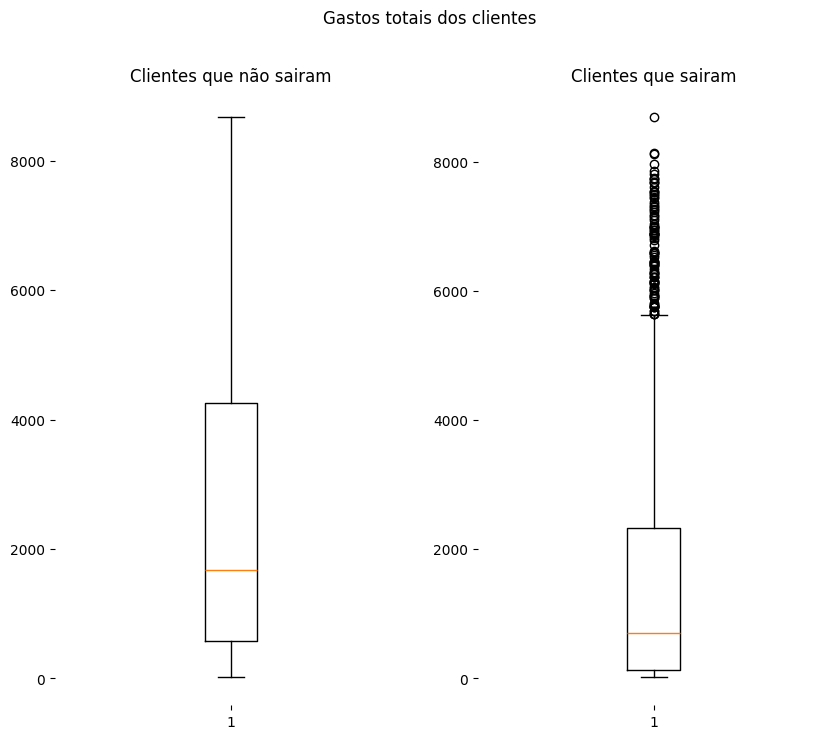

In [26]:
total_churn_nao = pd.to_numeric(churn_nao['Total'])
total_churn_sim = pd.to_numeric(churn_sim['Total'])


fig, ax = plt.subplots(1, 2, figsize=(10, 8))

fig.suptitle('Gastos totais dos clientes')

ax[0].boxplot(total_churn_nao.dropna())
ax[0].set_title('Clientes que não sairam')
ax[0].set_frame_on(False)

ax[1].boxplot(total_churn_sim.dropna())
ax[1].set_title('Clientes que sairam')
ax[1].set_frame_on(False)

plt.show()

### Análise de Correlação entre Variáveis

In [24]:
contas_diarias = df_final['Contas_Diarias']
evasao = df_final['Churn']

corr_contas_diarias_evasao = contas_diarias.corr(evasao)

/tmp/ipython-input-25-1649758935.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([grupo_nao, grupo_sim], labels=['Não saiu', 'Saiu'])


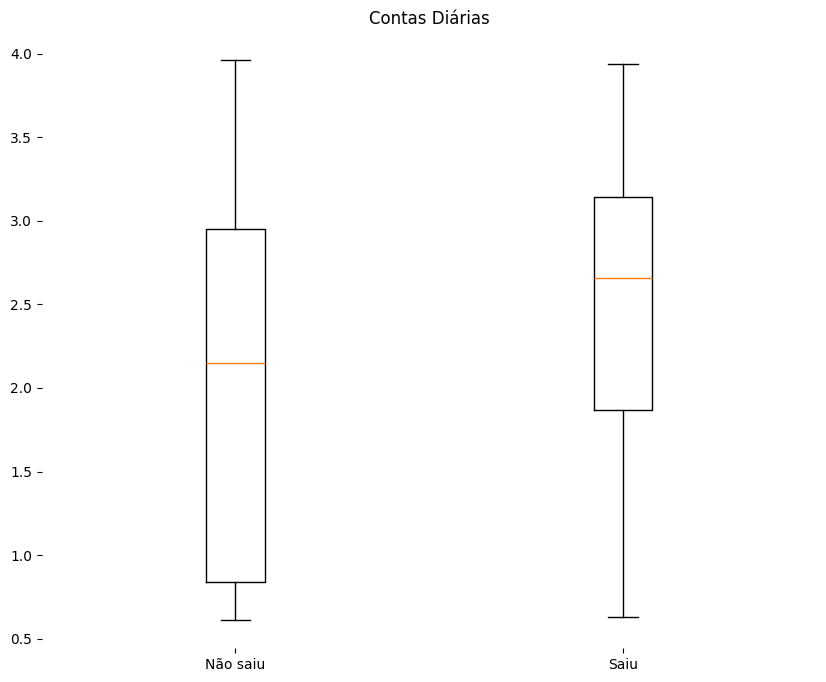

In [25]:
grupo_nao = df_final[df_final['Churn'] == 0]['Contas_Diarias']
grupo_sim = df_final[df_final['Churn'] == 1]['Contas_Diarias']

fig, ax = plt.subplots(figsize=(10, 8))

ax.boxplot([grupo_nao, grupo_sim], labels=['Não saiu', 'Saiu'])

ax.set_title('Contas Diárias')
ax.set_frame_on(False)

plt.show()

#📄Relatorio Final

📝 Resumo dos dados obtidos

* Dentre os dados válidos, 73,5\% dos clientes permaneceram na empresa, ou seja, 26,5\% dos clientes deixaram a empresa.  
* Entre os clientes que deixaram a empresa, a grande maioria possuía contrato mensal.  
* 57,3\% dos clientes que saíram utilizavam o cheque eletrônico como forma de pagamento, enquanto, entre os que permaneceram, essa forma representa apenas 25\%.  
* A mediana do tempo de contrato dos clientes que se evadiram é inferior a 10 meses.  
* Os gastos mensais do cliente que sairam é próximo a R\$ 80,00, enquantos os que ficaram é próximo a R\$ 60,00.
* Em relação aos gastos totais, a mediana para os clientes que saíram é superior a R\$ 1.500,00, enquanto, entre os que permaneceram, é inferior a R\$ 1.000,00.


### 💡 Sugestões de melhorias

* Buscar oferecer contratos de longa duração, incentivando a fidelização dos clientes;

* Manter contato com os clientes para receber feedback, especialmente daqueles com contratos de curta duração;

* Incentivar o pagamento dos serviços por meio de métodos de cobrança automática;

* Criar pacotes promocionais que integrem diversos serviços, com o objetivo de atrair mais clientes e reduzir a percepção de alto gasto mensal por parte do consumidor.